In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the data from matlab file
import scipy.io as sio
df_blood = sio.loadmat('./blood/BWG_BL_CDvCTRL.mat')
df_breath = sio.loadmat('./breath/BWG_BR_CDvCTRL.mat')
df_faecal = sio.loadmat('./faecal/BWG_FA_CDvCTRL.mat')
df_urine = sio.loadmat('./urine/BWG_UR_CDvCTRL.mat')

In [5]:
def check_dimension(sample_folder, feature):
    if sample_folder=='blood':
        print(f"{feature} dim in {sample_folder} : {df_blood[feature].shape}")
    elif sample_folder=='breath':
        print(f"{feature} dim in {sample_folder} : {df_breath[feature].shape}")
    elif sample_folder=='faecal':
        print(f"{feature} dim in {sample_folder} : {df_faecal[feature].shape}")
    elif sample_folder=='urine':
        print(f"{feature} dim in {sample_folder} : {df_urine[feature].shape}")

In [6]:
check_dimension('blood','XTIC')
check_dimension('blood','CLASS')
check_dimension('blood','RT')

XTIC dim in blood : (32, 4349)
CLASS dim in blood : (32, 1)
RT dim in blood : (4349, 1)


In [7]:
check_dimension('breath','XTIC')
check_dimension('breath','CLASS')
check_dimension('breath','RT')

XTIC dim in breath : (35, 4349)
CLASS dim in breath : (35, 1)
RT dim in breath : (4349, 1)


In [8]:
check_dimension('faecal','XTIC')
check_dimension('faecal','CLASS')
check_dimension('faecal','RT')

XTIC dim in faecal : (23, 4349)
CLASS dim in faecal : (23, 1)
RT dim in faecal : (4349, 1)


In [9]:
check_dimension('urine','XTIC')
check_dimension('urine','CLASS')
check_dimension('urine','RT')

XTIC dim in urine : (22, 4349)
CLASS dim in urine : (22, 1)
RT dim in urine : (4349, 1)


In [10]:
def plot_graph_RT_XTIC(sample_folder, row_number):
    if sample_folder=='blood':
        rowNames = [[i][0][0][0] for i in df_blood['SAM']]
        plt.figure(figsize=(15,5))
        plt.plot(df_blood['RT'],df_blood['XTIC'][row_number,], c='green',linewidth=3, label=rowNames[row_number])
        plt.title(f"XTIC & RT ({sample_folder})", fontsize=18)
        plt.xlabel("RT",fontsize=18)
        plt.ylabel("XTIC",fontsize=18)  
        plt.legend()
        plt.show()
    elif sample_folder=='breath':
        rowNames = [[i][0][0][0] for i in df_breath['SAM']]
        plt.figure(figsize=(15,5))
        plt.plot(df_breath['RT'],df_breath['XTIC'][row_number,], c='green',linewidth=3, label=rowNames[row_number])
        plt.title(f"XTIC & RT ({sample_folder})", fontsize=18)
        plt.xlabel("RT",fontsize=18)
        plt.ylabel("XTIC",fontsize=18)  
        plt.legend()
        plt.show()
    elif sample_folder=='faecal':
        rowNames = [[i][0][0][0] for i in df_faecal['SAM']]
        plt.figure(figsize=(15,5))
        plt.plot(df_faecal['RT'],df_faecal['XTIC'][row_number,], c='green',linewidth=3, label=rowNames[row_number])
        plt.title(f"XTIC & RT ({sample_folder})", fontsize=18)
        plt.xlabel("RT",fontsize=18)
        plt.ylabel("XTIC",fontsize=18)  
        plt.legend()
        plt.show()
    elif sample_folder=='urine':
        rowNames = [[i][0][0][0] for i in df_urine['SAM']]
        plt.figure(figsize=(15,5))
        plt.plot(df_urine['RT'],df_urine['XTIC'][row_number,], c='green',linewidth=3, label=rowNames[row_number])
        plt.title(f"XTIC & RT ({sample_folder})", fontsize=18)
        plt.xlabel("RT",fontsize=18)
        plt.ylabel("XTIC",fontsize=18)  
        plt.legend()
        plt.show()
    

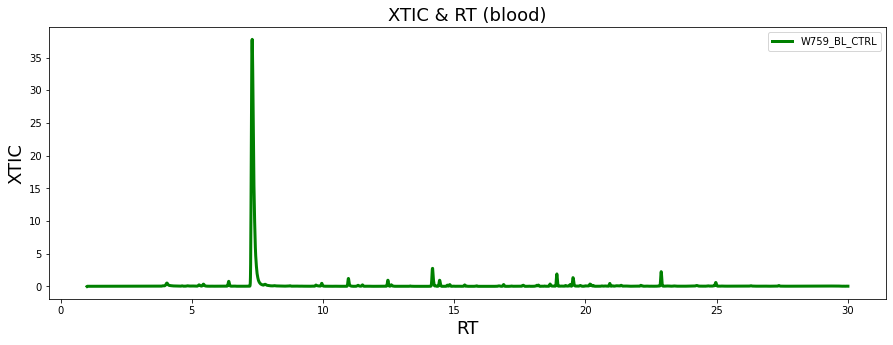

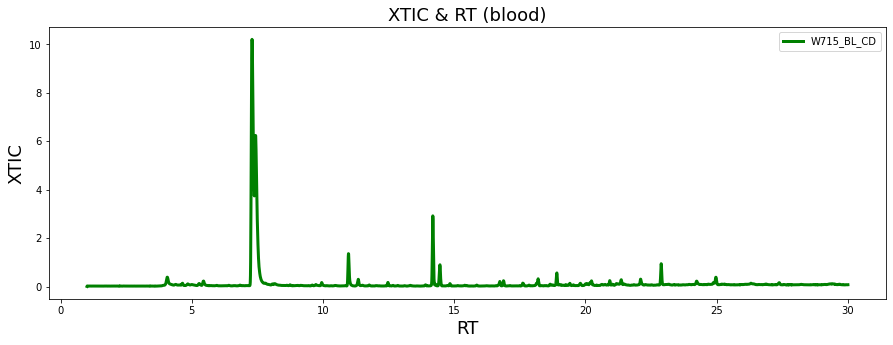

In [11]:
plot_graph_RT_XTIC('blood',1)
plot_graph_RT_XTIC('blood',20)

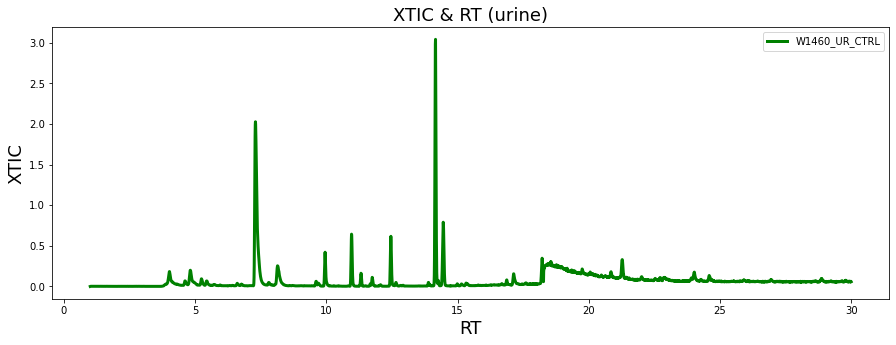

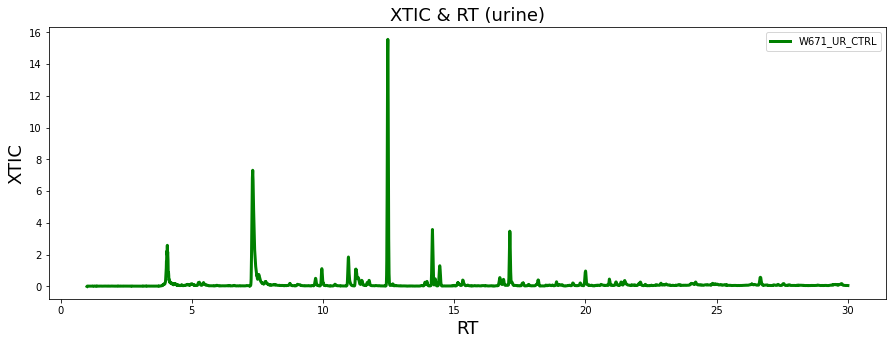

In [12]:
plot_graph_RT_XTIC('urine',1)
plot_graph_RT_XTIC('urine',10)

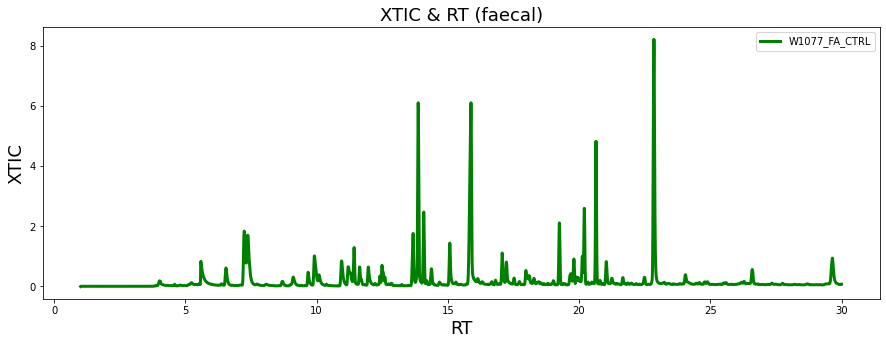

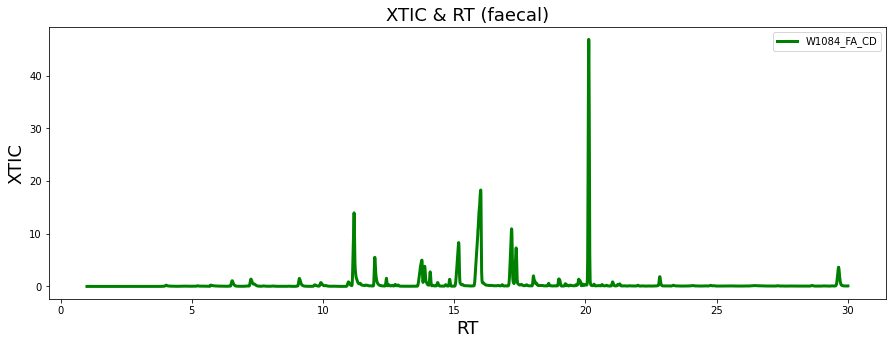

In [13]:
plot_graph_RT_XTIC('faecal',1)
plot_graph_RT_XTIC('faecal',15)

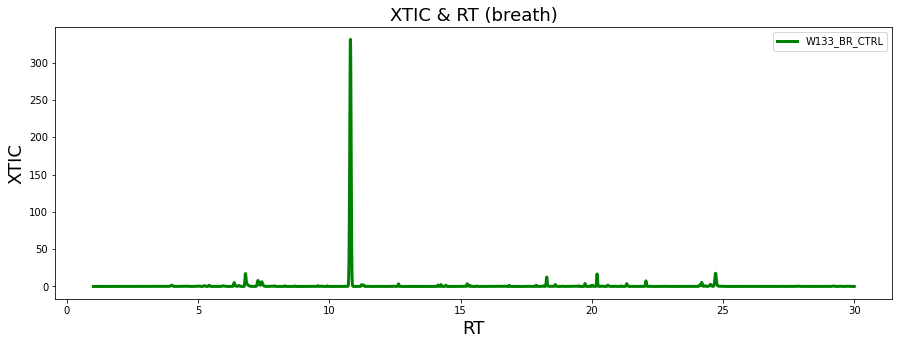

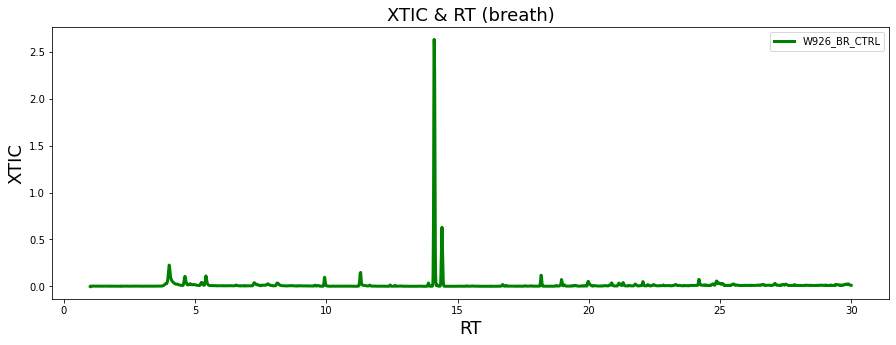

In [12]:
plot_graph_RT_XTIC('breath',10)
plot_graph_RT_XTIC('breath',18)

In [14]:
# lets try to convert the data into dataframe
df_blood_ = pd.DataFrame(np.array(df_blood['XTIC']))
label_blood_ = df_blood['CLASS']
df_blood_['label'] = label_blood_.reshape(1,-1).ravel() # combine the data and label

df_breath_ = pd.DataFrame(np.array(df_breath['XTIC']))
label_breath_ = df_breath['CLASS']
df_breath_['label'] = label_breath_.reshape(1,-1).ravel() # combine the data and label

df_faecal_ = pd.DataFrame(np.array(df_faecal['XTIC']))
label_faecal_ = df_faecal['CLASS']
df_faecal_['label'] = label_faecal_.reshape(1,-1).ravel() # combine the data and label

df_urine_ = pd.DataFrame(np.array(df_urine['XTIC']))
label_urine_ = df_urine['CLASS']
df_urine_['label'] = label_urine_.reshape(1,-1).ravel() # combine the data and label

In [15]:
def check_description_of_dataset(data):
    return data.describe().T

In [16]:
print(tabulate(check_description_of_dataset(df_blood_), headers = 'keys', tablefmt = 'psql'))

+-------+---------+------------+-------------+-------------+-------------+-------------+-------------+------------+
|       |   count |       mean |         std |         min |         25% |         50% |         75% |        max |
|-------+---------+------------+-------------+-------------+-------------+-------------+-------------+------------|
| 0     |      32 | 0.00157168 |  0.00220652 | 0           | 0.000122101 | 0.000506562 |  0.00241688 |  0.0101002 |
| 1     |      32 | 0.0114686  |  0.00990678 | 0.000770313 | 0.00156133  | 0.0139516   |  0.0174714  |  0.0293449 |
| 2     |      32 | 0.0113357  |  0.00986882 | 0.000791521 | 0.00145823  | 0.0137547   |  0.0169181  |  0.0304307 |
| 3     |      32 | 0.0111848  |  0.00976597 | 0.000649421 | 0.00136973  | 0.013279    |  0.0166795  |  0.0265832 |
| 4     |      32 | 0.0109716  |  0.0095769  | 0.000581193 | 0.00132045  | 0.0134996   |  0.0168534  |  0.0276116 |
| 5     |      32 | 0.0109645  |  0.00950196 | 0.00071807  | 0.00129638 

In [16]:
print(tabulate(check_description_of_dataset(df_breath_), headers = 'keys', tablefmt = 'psql'))

+-------+---------+-----------+------------+-------------+-------------+------------+-------------+-----------+
|       |   count |      mean |        std |         min |         25% |        50% |         75% |       max |
|-------+---------+-----------+------------+-------------+-------------+------------+-------------+-----------|
| 0     |      35 |  0.237678 |   1.29959  | 5.29069e-05 | 0.000406055 | 0.00224648 |  0.00893062 |   7.70163 |
| 1     |      35 |  0.349331 |   2.02755  | 0           | 0.000658358 | 0.00396886 |  0.00911556 |  12.0017  |
| 2     |      35 |  0.348231 |   2.02503  | 0           | 0.000537439 | 0.00373226 |  0.00789546 |  11.9861  |
| 3     |      35 |  0.346538 |   2.01484  | 0           | 0.000513506 | 0.00345018 |  0.00816341 |  11.9258  |
| 4     |      35 |  0.345829 |   2.01172  | 0           | 0.000637143 | 0.00345992 |  0.00807022 |  11.9072  |
| 5     |      35 |  0.346803 |   2.01626  | 0           | 0.000344076 | 0.00357175 |  0.00821385 |  11.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [18]:
def get_X_and_y(dataset_name):
    if dataset_name == 'blood':
        X = df_blood_.iloc[:,:-1]
        y = df_blood_.iloc[:,-1]
        return X,y
    elif dataset_name == 'breath':
        X = df_breath_.iloc[:,:-1]
        y = df_breath_.iloc[:,-1]
        return X,y
    elif dataset_name == 'faecal':
        X = df_faecal_.iloc[:,:-1]
        y = df_faecal_.iloc[:,-1]
        return X,y
    elif dataset_name == 'urine':
        X = df_urine_.iloc[:,:-1]
        y = df_urine_.iloc[:,-1]
        return X,y

# PCA

* It is imperative to mention that a feature set must be **normalized** before applying PCA.
* Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on.

In [19]:
def retain_PCs(X,name):
    pca = PCA()
    pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
    Xt = pipe.fit_transform(X)
    
    pc_list = ["PC"+str(i) for i in list(range(1, len(pca.explained_variance_ratio_.tolist())+1))]
    pca_variance = pca.explained_variance_ratio_.tolist()
    pca_df = pd.DataFrame({'pca_feature':pc_list,f'variance ({name})':pca_variance})
    pca_df[f'variance ({name})'] = round(pca_df[f'variance ({name})']*100,2)
    print(tabulate(pca_df, headers = 'keys', tablefmt = 'psql'))
    plt.figure(figsize=(10,5))
    plt.plot(pc_list,pca_variance,c='red',marker='X', linewidth=2,markersize=9)
    plt.title(f"PCA Variance Graph ({name})", fontsize=18)
    plt.xlabel("PCs",fontsize=18)
    plt.ylabel("Variance",fontsize=18)  
    plt.xticks(rotation=90)
    plt.show()

+----+---------------+--------------------+
|    | pca_feature   |   variance (blood) |
|----+---------------+--------------------|
|  0 | PC1           |              60.38 |
|  1 | PC2           |              15.02 |
|  2 | PC3           |               9.74 |
|  3 | PC4           |               2.85 |
|  4 | PC5           |               2.03 |
|  5 | PC6           |               1.61 |
|  6 | PC7           |               1.49 |
|  7 | PC8           |               1.1  |
|  8 | PC9           |               0.9  |
|  9 | PC10          |               0.87 |
| 10 | PC11          |               0.65 |
| 11 | PC12          |               0.54 |
| 12 | PC13          |               0.47 |
| 13 | PC14          |               0.31 |
| 14 | PC15          |               0.28 |
| 15 | PC16          |               0.24 |
| 16 | PC17          |               0.2  |
| 17 | PC18          |               0.19 |
| 18 | PC19          |               0.16 |
| 19 | PC20          |          

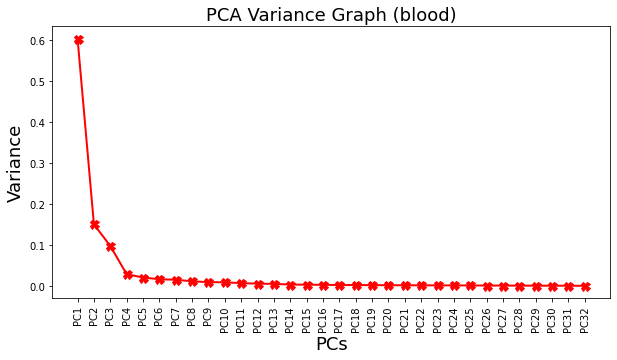

In [20]:
X_blood,y_blood= get_X_and_y('blood')
retain_PCs(X_blood,'blood')

* It can be seen that first principal component is responsible for **60.38%** variance. Similarly, the second principal component causes **15.02%** variance in the dataset and third principal component **9.74%** variance in the dataset . Collectively we can say that **(60.38 + 15.02 + 9.74) = 85.14%** percent of the classification information contained in the feature set is captured by the first three principal components.
* For instance, in the chart above, we can see that after the third principal component the change in variance almost diminishes. Therefore, first **three components** can be selected for **BLOOD**.


+----+---------------+---------------------+
|    | pca_feature   |   variance (breath) |
|----+---------------+---------------------|
|  0 | PC1           |               82.27 |
|  1 | PC2           |               11.35 |
|  2 | PC3           |                2.57 |
|  3 | PC4           |                1.11 |
|  4 | PC5           |                1.09 |
|  5 | PC6           |                0.76 |
|  6 | PC7           |                0.33 |
|  7 | PC8           |                0.17 |
|  8 | PC9           |                0.12 |
|  9 | PC10          |                0.05 |
| 10 | PC11          |                0.05 |
| 11 | PC12          |                0.04 |
| 12 | PC13          |                0.02 |
| 13 | PC14          |                0.01 |
| 14 | PC15          |                0.01 |
| 15 | PC16          |                0.01 |
| 16 | PC17          |                0.01 |
| 17 | PC18          |                0.01 |
| 18 | PC19          |                0.01 |
| 19 | PC2

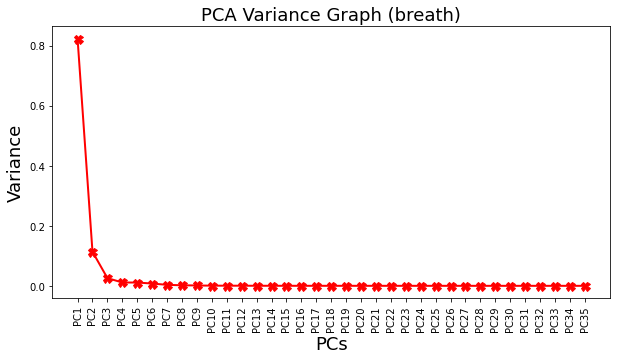

In [23]:
X_breath,y_breath= get_X_and_y('breath')
retain_PCs(X_breath,'breath')

* It can be seen that first principal component is responsible for **82.27%** variance. Similarly, the second principal component causes **11.35%** variance in the dataset. Collectively we can say that **(82.27 + 11.35) = 93.62%** percent of the classification information contained in the feature set is captured by the first three principal components.
* For instance, in the chart above, we can see that after the second principal component the change in variance almost diminishes. Therefore, first **two components** can be selected for **BREATH**.


+----+---------------+---------------------+
|    | pca_feature   |   variance (faecal) |
|----+---------------+---------------------|
|  0 | PC1           |               35.06 |
|  1 | PC2           |               21.68 |
|  2 | PC3           |               14.49 |
|  3 | PC4           |                6.45 |
|  4 | PC5           |                3.71 |
|  5 | PC6           |                3.05 |
|  6 | PC7           |                2.84 |
|  7 | PC8           |                1.98 |
|  8 | PC9           |                1.91 |
|  9 | PC10          |                1.44 |
| 10 | PC11          |                1.17 |
| 11 | PC12          |                1.05 |
| 12 | PC13          |                0.86 |
| 13 | PC14          |                0.76 |
| 14 | PC15          |                0.74 |
| 15 | PC16          |                0.67 |
| 16 | PC17          |                0.63 |
| 17 | PC18          |                0.51 |
| 18 | PC19          |                0.45 |
| 19 | PC2

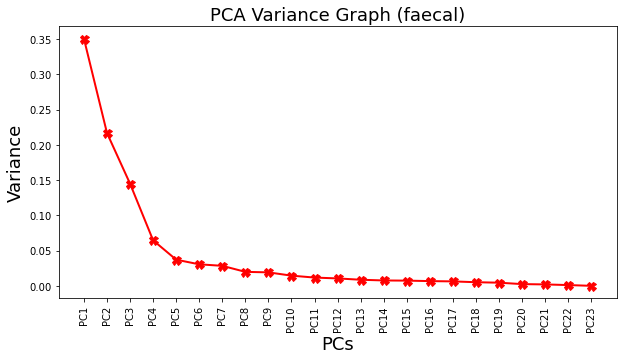

In [24]:
X_faecal,y_faecal= get_X_and_y('faecal')
retain_PCs(X_faecal,'faecal')

* It can be seen that first principal component is responsible for **35.06%** variance. Similarly, the second principal component causes **21.68%** variance in the dataset and third principal component **14.49%** variance in the dataset and four is **6.45%**. Collectively we can say that **(35.06 + 21.68 + 14.49 + 6.45) = 77.68%** percent of the classification information contained in the feature set is captured by the first three principal components.
* For instance, in the chart above, we can see that after the third principal component the change in variance almost diminishes. Therefore, first **four components** can be selected for **FAECAL**.


+----+---------------+--------------------+
|    | pca_feature   |   variance (urine) |
|----+---------------+--------------------|
|  0 | PC1           |              75.39 |
|  1 | PC2           |              10.54 |
|  2 | PC3           |               3.63 |
|  3 | PC4           |               2.21 |
|  4 | PC5           |               1.76 |
|  5 | PC6           |               1.13 |
|  6 | PC7           |               0.94 |
|  7 | PC8           |               0.84 |
|  8 | PC9           |               0.61 |
|  9 | PC10          |               0.47 |
| 10 | PC11          |               0.42 |
| 11 | PC12          |               0.36 |
| 12 | PC13          |               0.31 |
| 13 | PC14          |               0.29 |
| 14 | PC15          |               0.23 |
| 15 | PC16          |               0.21 |
| 16 | PC17          |               0.19 |
| 17 | PC18          |               0.16 |
| 18 | PC19          |               0.13 |
| 19 | PC20          |          

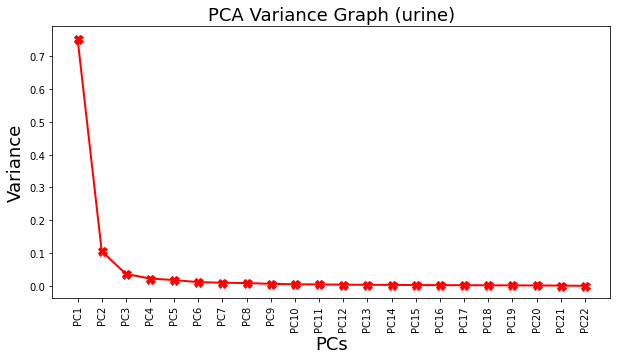

In [25]:
X_urine,y_urine= get_X_and_y('urine')
retain_PCs(X_urine,'urine')

* It can be seen that first principal component is responsible for **75.39%** variance. Similarly, the second principal component causes **10.54%** variance in the dataset. Collectively we can say that **(75.39 + 10.54) = 85.93%** percent of the classification information contained in the feature set is captured by the first three principal components.
* For instance, in the chart above, we can see that after the second principal component the change in variance almost diminishes. Therefore, first **two components** can be selected for **URINE**.


In [26]:
retain_PCS = pd.DataFrame({'sample name':['blood','breath','faecal','urine'],'retain PCs':[3,2,4,2]})
print(tabulate(retain_PCS, headers = 'keys', tablefmt = 'psql'))

+----+---------------+--------------+
|    | sample name   |   retain PCs |
|----+---------------+--------------|
|  0 | blood         |            3 |
|  1 | breath        |            2 |
|  2 | faecal        |            4 |
|  3 | urine         |            2 |
+----+---------------+--------------+


In [27]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split,GridSearchCV


In [30]:
def get_transform_data_through_retain_PCs(X,PCs_components):
    # now lets try to define the PCA 
    pca = PCA(n_components= PCs_components)
    pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
    X_pca = pipe.fit_transform(X)
    return X_pca

In [31]:
X_blood_pca = get_transform_data_through_retain_PCs(X_blood,PCs_components=3)
X_breath_pca = get_transform_data_through_retain_PCs(X_breath,PCs_components=2)
X_faecal_pca = get_transform_data_through_retain_PCs(X_faecal,PCs_components=4)
X_urine_pca = get_transform_data_through_retain_PCs(X_urine,PCs_components=2)

# Ensemble Random Forest Algorithm

### Ensemblers

In [65]:
def get_best_ensembles_random_forest(X,y,sample_name, test_size=0.3):
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'n_estimators': list(range(0,1525,25)),
    }
    # Create a based model
    rf = RandomForestClassifier()
    
    # cross validate the data
    cv = StratifiedShuffleSplit(n_splits=5, test_size=test_size,random_state=1)
    
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = cv, n_jobs = -1, verbose = 2,  scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    best_ensembles = []
    best_ensembles.append(grid_result.best_params_['n_estimators'])
    
    # summarize results
    print("="*100)
    print("Best: %f using %s" % (round(grid_result.best_score_,3), grid_result.best_params_))
    print("="*100)
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    results, names= list(), list()
    for mean, param in zip(means, params):
        print(f">ensemble = {param['n_estimators']} score = {round(mean,3)}")
        results.append(round(mean,3))
        names.append(param['n_estimators'])
    
    plt.figure(figsize=(15,5))
    plt.plot(names,results,marker='o', linewidth=2,markersize=9)
    plt.title(f"Random Forest Ensemble ({sample_name})", fontsize=18)
    plt.xlabel("Trees",fontsize=18)
    plt.ylabel("Average Testing Accuracy",fontsize=18)  
    plt.xticks(rotation=90)
    plt.xticks(names)
    plt.show()
    return results,names,best_ensembles


Fitting 5 folds for each of 61 candidates, totalling 305 fits
Best: 0.914000 using {'n_estimators': 50}
>ensemble = 0 score = nan
>ensemble = 25 score = 0.886
>ensemble = 50 score = 0.914
>ensemble = 75 score = 0.886
>ensemble = 100 score = 0.914
>ensemble = 125 score = 0.914
>ensemble = 150 score = 0.914
>ensemble = 175 score = 0.914
>ensemble = 200 score = 0.886
>ensemble = 225 score = 0.914
>ensemble = 250 score = 0.914
>ensemble = 275 score = 0.914
>ensemble = 300 score = 0.886
>ensemble = 325 score = 0.914
>ensemble = 350 score = 0.914
>ensemble = 375 score = 0.914
>ensemble = 400 score = 0.914
>ensemble = 425 score = 0.914
>ensemble = 450 score = 0.914
>ensemble = 475 score = 0.914
>ensemble = 500 score = 0.914
>ensemble = 525 score = 0.914
>ensemble = 550 score = 0.914
>ensemble = 575 score = 0.914
>ensemble = 600 score = 0.914
>ensemble = 625 score = 0.886
>ensemble = 650 score = 0.886
>ensemble = 675 score = 0.914
>ensemble = 700 score = 0.914
>ensemble = 725 score = 0.886
>en

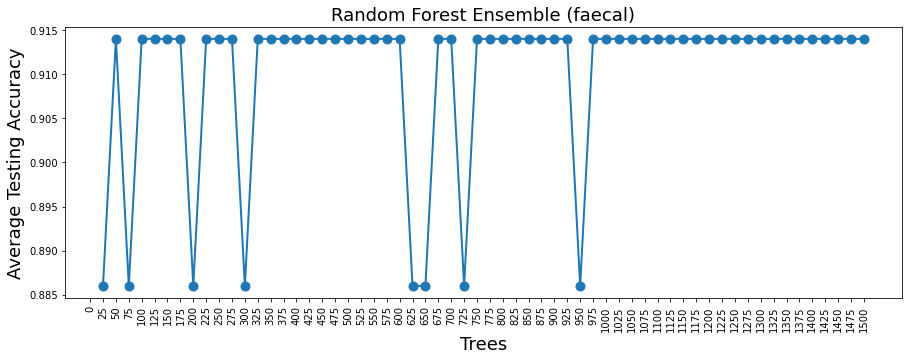

In [66]:
results_faecal,names_ens_rf,best_ensembles_faecal = get_best_ensembles_random_forest(X_faecal_pca,y_faecal,'faecal', test_size=0.3)



Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best: 0.560000 using {'n_estimators': 100}
>ensemble = 50 score = 0.55
>ensemble = 100 score = 0.56
>ensemble = 150 score = 0.54
>ensemble = 200 score = 0.53
>ensemble = 250 score = 0.55
>ensemble = 300 score = 0.54


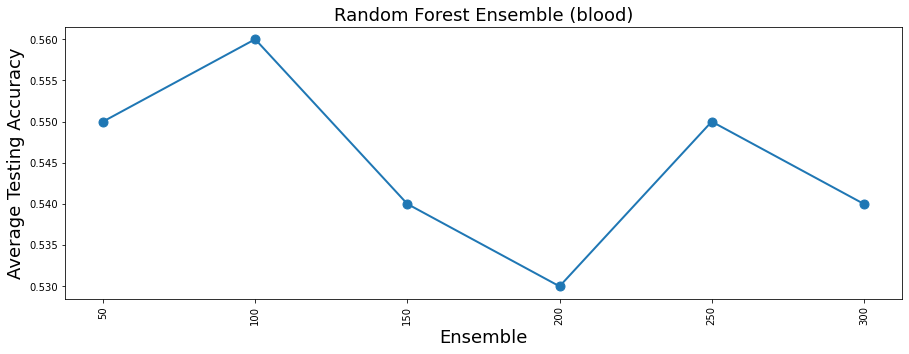

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best: 0.564000 using {'n_estimators': 150}
>ensemble = 50 score = 0.555
>ensemble = 100 score = 0.545
>ensemble = 150 score = 0.564
>ensemble = 200 score = 0.545
>ensemble = 250 score = 0.545
>ensemble = 300 score = 0.555


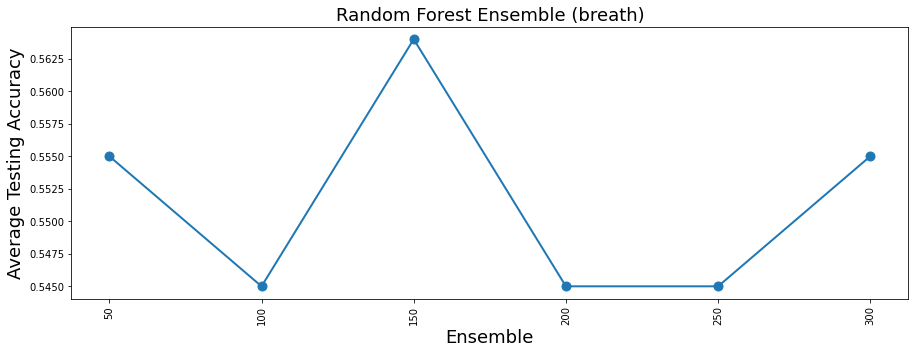

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best: 0.871000 using {'n_estimators': 200}
>ensemble = 50 score = 0.843
>ensemble = 100 score = 0.857
>ensemble = 150 score = 0.814
>ensemble = 200 score = 0.871
>ensemble = 250 score = 0.829
>ensemble = 300 score = 0.829


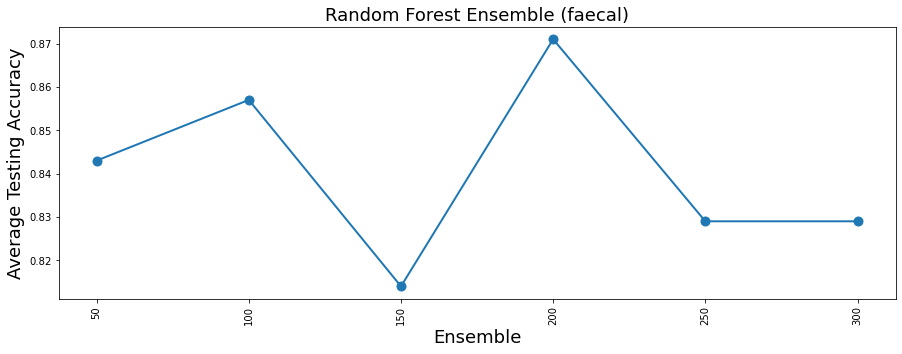

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best: 0.586000 using {'n_estimators': 100}
>ensemble = 50 score = 0.557
>ensemble = 100 score = 0.586
>ensemble = 150 score = 0.571
>ensemble = 200 score = 0.571
>ensemble = 250 score = 0.571
>ensemble = 300 score = 0.557


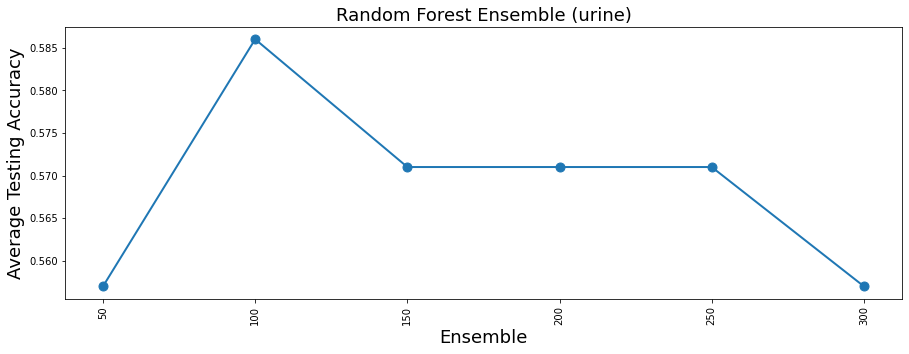

In [29]:
results_blood,names_ens_rf,best_ensembles_blood = get_best_ensembles_random_forest(X_blood_pca,y_blood,'blood', test_size=0.3)
results_breath,names_ens_rf,best_ensembles_breath = get_best_ensembles_random_forest(X_breath_pca,y_breath,'breath', test_size=0.3)
results_faecal,names_ens_rf,best_ensembles_faecal = get_best_ensembles_random_forest(X_faecal_pca,y_faecal,'faecal', test_size=0.3)
results_urine,names_ens_rf,best_ensembles_urine = get_best_ensembles_random_forest(X_urine_pca,y_urine,'urine', test_size=0.3)

In [30]:
ensembles_df = pd.DataFrame({
    'ensembles (RF)' : names_ens_rf,
    'avgTestingAcc(blood)' : results_blood,
    'avgTestingAcc(breath)' : results_breath,
    'avgTestingAcc(faecal)' : results_faecal,
    'avgTestingAcc(urine)' : results_urine,
})
print(tabulate(ensembles_df, headers = 'keys', tablefmt = 'psql'))

+----+------------------+------------------------+-------------------------+-------------------------+------------------------+
|    |   ensembles (RF) |   avgTestingAcc(blood) |   avgTestingAcc(breath) |   avgTestingAcc(faecal) |   avgTestingAcc(urine) |
|----+------------------+------------------------+-------------------------+-------------------------+------------------------|
|  0 |               50 |                   0.55 |                   0.555 |                   0.843 |                  0.557 |
|  1 |              100 |                   0.56 |                   0.545 |                   0.857 |                  0.586 |
|  2 |              150 |                   0.54 |                   0.564 |                   0.814 |                  0.571 |
|  3 |              200 |                   0.53 |                   0.545 |                   0.871 |                  0.571 |
|  4 |              250 |                   0.55 |                   0.545 |                   0.829 |  

In [31]:
best_ensembles_df = pd.DataFrame({
    'sample_names':['blood','breath','faecal','urine'],
    'best_ensemble (RF)':[best_ensembles_blood[0],best_ensembles_breath[0],best_ensembles_faecal[0],best_ensembles_urine[0]]
})
print(tabulate(best_ensembles_df, headers = 'keys', tablefmt = 'psql'))

+----+----------------+----------------------+
|    | sample_names   |   best_ensemble (RF) |
|----+----------------+----------------------|
|  0 | blood          |                  100 |
|  1 | breath         |                  150 |
|  2 | faecal         |                  200 |
|  3 | urine          |                  100 |
+----+----------------+----------------------+


### Bootstrap

In [32]:
def get_best_bootstrap_random_forest(X,y,sample_name,test_size=0.3):
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_samples': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,None]
    }
    # Create a based model
    rf = RandomForestClassifier()
    
    # cross validate the data
    cv = StratifiedShuffleSplit(n_splits=10, test_size=test_size,random_state=1)
    
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = cv, n_jobs = -1, verbose = 2,  scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    best_bootstrap = []
    if grid_result.best_params_['max_samples'] == None:
        best_bootstrap.append(1.0)
    else:
        best_bootstrap.append(grid_result.best_params_['max_samples'])
    
    # summarize results
    print("="*100)
    print("Best: %f using %s" % (round(grid_result.best_score_,3), grid_result.best_params_))
    print("="*100)
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    results, names= list(), list()
    for mean, param in zip(means, params):
        print(f">bootstrap sample size = {param['max_samples']} score = {round(mean,3)}")
        results.append(round(mean,3))
        if param['max_samples']==None:
            names.append(1.0)
        else:
            names.append(param['max_samples'])
    
    plt.figure(figsize=(15,5))
    names = (np.array(names).astype(float)*100).astype(int).tolist()
    plt.plot(names,results,marker='o', linewidth=2,markersize=9)
    plt.title(f"Random Forest Bootstrap Sample Size ({sample_name})", fontsize=18)
    plt.xlabel("Bootstrap",fontsize=18)
    plt.ylabel("Average Testing Accuracy",fontsize=18)  
    plt.xticks(rotation=90)
    plt.xticks(names)
    plt.show()
    return results,names,best_bootstrap


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best: 0.570000 using {'max_samples': 0.1}
>bootstrap sample size = 0.1 score = 0.57
>bootstrap sample size = 0.2 score = 0.55
>bootstrap sample size = 0.3 score = 0.46
>bootstrap sample size = 0.4 score = 0.52
>bootstrap sample size = 0.5 score = 0.49
>bootstrap sample size = 0.6 score = 0.5
>bootstrap sample size = 0.7 score = 0.5
>bootstrap sample size = 0.8 score = 0.57
>bootstrap sample size = 0.9 score = 0.53
>bootstrap sample size = None score = 0.54


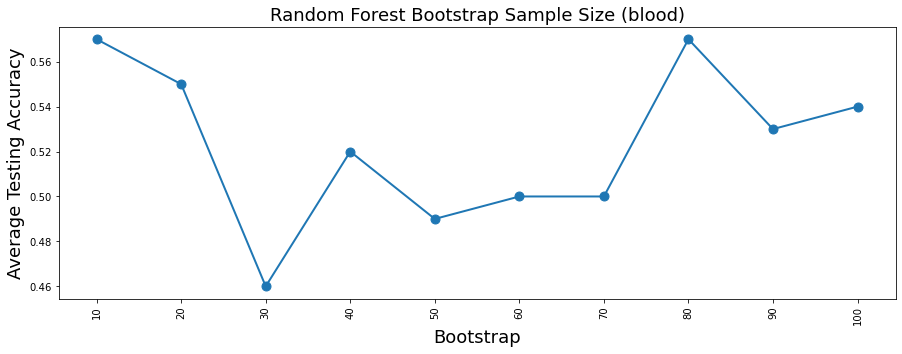

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best: 0.582000 using {'max_samples': 0.3}
>bootstrap sample size = 0.1 score = 0.545
>bootstrap sample size = 0.2 score = 0.564
>bootstrap sample size = 0.3 score = 0.582
>bootstrap sample size = 0.4 score = 0.527
>bootstrap sample size = 0.5 score = 0.564
>bootstrap sample size = 0.6 score = 0.518
>bootstrap sample size = 0.7 score = 0.555
>bootstrap sample size = 0.8 score = 0.536
>bootstrap sample size = 0.9 score = 0.564
>bootstrap sample size = None score = 0.555


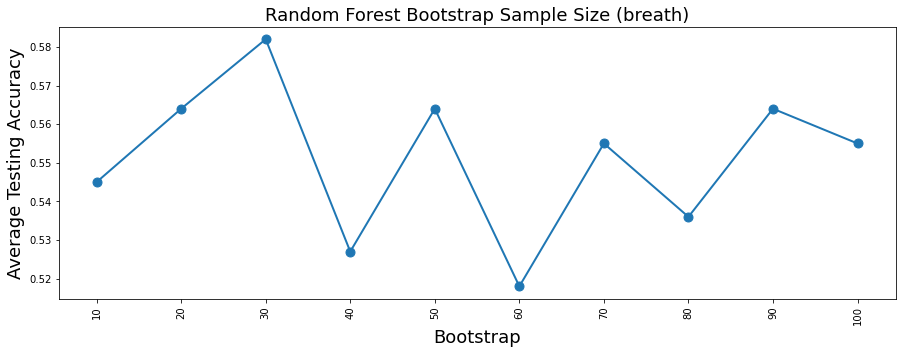

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best: 0.900000 using {'max_samples': 0.3}
>bootstrap sample size = 0.1 score = 0.814
>bootstrap sample size = 0.2 score = 0.857
>bootstrap sample size = 0.3 score = 0.9
>bootstrap sample size = 0.4 score = 0.857
>bootstrap sample size = 0.5 score = 0.843
>bootstrap sample size = 0.6 score = 0.857
>bootstrap sample size = 0.7 score = 0.857
>bootstrap sample size = 0.8 score = 0.857
>bootstrap sample size = 0.9 score = 0.829
>bootstrap sample size = None score = 0.843


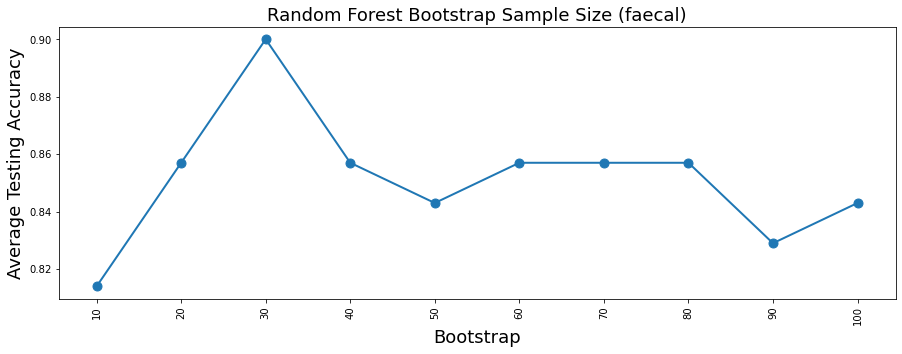

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best: 0.586000 using {'max_samples': 0.2}
>bootstrap sample size = 0.1 score = 0.571
>bootstrap sample size = 0.2 score = 0.586
>bootstrap sample size = 0.3 score = 0.557
>bootstrap sample size = 0.4 score = 0.571
>bootstrap sample size = 0.5 score = 0.571
>bootstrap sample size = 0.6 score = 0.586
>bootstrap sample size = 0.7 score = 0.543
>bootstrap sample size = 0.8 score = 0.557
>bootstrap sample size = 0.9 score = 0.543
>bootstrap sample size = None score = 0.571


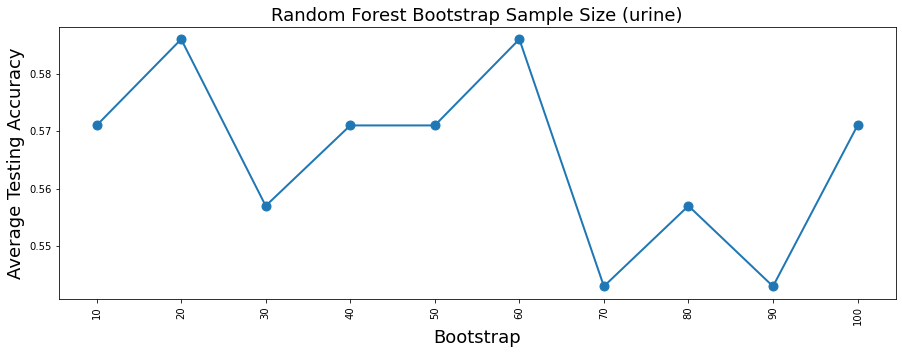

In [33]:
results_blood_BS,names_BS_rf,best_bootstrap_blood = get_best_bootstrap_random_forest(X_blood_pca,y_blood,'blood',test_size=0.3)
results_breath_BS,names_BS_rf,best_bootstrap_breath = get_best_bootstrap_random_forest(X_breath_pca,y_breath,'breath',test_size=0.3)
results_faecal_BS,names_BS_rf,best_bootstrap_faecal = get_best_bootstrap_random_forest(X_faecal_pca,y_faecal,'faecal',test_size=0.3)
results_urine_BS,names_BS_rf,best_bootstrap_urine = get_best_bootstrap_random_forest(X_urine_pca,y_urine,'urine',test_size=0.3)

In [ ]:
results_faecal_BS,names_BS_rf,best_bootstrap_faecal = get_best_bootstrap_random_forest(X_faecal_pca,y_faecal,'faecal',test_size=0.3)



In [34]:
bootstrap_df = pd.DataFrame({
    'Boostrap (RF)' : names_BS_rf,
    'avgTestingAcc(blood)' : results_blood_BS,
    'avgTestingAcc(breath)' : results_breath_BS,
    'avgTestingAcc(faecal)' : results_faecal_BS,
    'avgTestingAcc(urine)' : results_urine_BS,
})
print(tabulate(bootstrap_df, headers = 'keys', tablefmt = 'psql'))

+----+-----------------+------------------------+-------------------------+-------------------------+------------------------+
|    |   Boostrap (RF) |   avgTestingAcc(blood) |   avgTestingAcc(breath) |   avgTestingAcc(faecal) |   avgTestingAcc(urine) |
|----+-----------------+------------------------+-------------------------+-------------------------+------------------------|
|  0 |              10 |                   0.53 |                   0.573 |                   0.829 |                  0.571 |
|  1 |              20 |                   0.52 |                   0.582 |                   0.929 |                  0.571 |
|  2 |              30 |                   0.44 |                   0.582 |                   0.886 |                  0.586 |
|  3 |              40 |                   0.51 |                   0.564 |                   0.857 |                  0.571 |
|  4 |              50 |                   0.53 |                   0.564 |                   0.9   |          

In [35]:
best_bootstrap_df = pd.DataFrame({
    'sample_names':['blood','breath','faecal','urine'],
    'best_bootstrap_sample (RF)':[(best_bootstrap_blood[0]*100),(best_bootstrap_breath[0]*100),
                             (best_bootstrap_faecal[0]*100),(best_bootstrap_urine[0]*100)]
})
print(tabulate(best_bootstrap_df, headers = 'keys', tablefmt = 'psql'))

+----+----------------+------------------------------+
|    | sample_names   |   best_bootstrap_sample (RF) |
|----+----------------+------------------------------|
|  0 | blood          |                           90 |
|  1 | breath         |                           20 |
|  2 | faecal         |                           20 |
|  3 | urine          |                           60 |
+----+----------------+------------------------------+


### Holdout Validation on Final Model

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
def holdout_validation(X,y,test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = 42)
    return X_train,X_test,y_train,y_test

NameError: name 'X_train' is not defined

In [ ]:
# function for evaluation metrics
def modelEvaluation(predictions, y_test_set, sample_name):
    print("==========",sample_name,"==========")
    # Print model evaluation to predicted result    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    cm = confusion_matrix(y_test_set, predictions)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap='viridis')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    

In [ ]:
def get_best_parameters(sample_name):
    sample = int(best_bootstrap_df[best_bootstrap_df['sample_names']==f'{sample_name}']['best_bootstrap_sample (RF)'].tolist()[0])
    ensemble = best_ensembles_df[best_ensembles_df['sample_names']==f'{sample_name}']['best_ensemble (RF)'].tolist()[0]
    return ensemble,sample

In [ ]:
ensemble_blood,bootstrap_blood = get_best_parameters('blood')
ensemble_breath,bootstrap_breath = get_best_parameters('breath')
ensemble_faecal,bootstrap_faecal = get_best_parameters('faecal')
ensemble_urine,bootstrap_urine= get_best_parameters('urine')

In [ ]:
def get_final_model(ensemble,bootstrap):
    if bootstrap == 100:
        rf = RandomForestClassifier(n_estimators = ensemble,max_samples = None)
    else:
        rf = RandomForestClassifier(n_estimators = ensemble,max_samples = (bootstrap/100))
    return rf

In [ ]:
model_blood = get_final_model(ensemble_blood,bootstrap_blood)
X_train_blood,X_test_blood,y_train_blood,y_test_blood = holdout_validation(X_blood_pca,y_blood,test_size=0.3)
model_blood.fit(X_train_blood,y_train_blood)
y_pred = model_blood.predict(X_test_blood)
modelEvaluation(y_pred,y_test_blood,'Sample blood Results')

In [ ]:
model_breath = get_final_model(ensemble_breath,bootstrap_breath)
X_train_breath,X_test_breath,y_train_breath,y_test_breath = holdout_validation(X_breath_pca,y_breath,test_size=0.3)
model_breath.fit(X_train_breath,y_train_breath)
y_pred = model_breath.predict(X_test_breath)
modelEvaluation(y_pred,y_test_breath,'Sample breath Results')

In [ ]:
model_faecal = get_final_model(ensemble_faecal,bootstrap_faecal)
X_train_faecal,X_test_faecal,y_train_faecal,y_test_faecal = holdout_validation(X_faecal_pca,y_faecal,test_size=0.3)
model_faecal.fit(X_train_faecal,y_train_faecal)
y_pred = model_faecal.predict(X_test_faecal)
modelEvaluation(y_pred,y_test_faecal,'Sample faecal Results')

In [ ]:
model_urine = get_final_model(ensemble_urine,bootstrap_urine)
X_train_urine,X_test_urine,y_train_urine,y_test_urine = holdout_validation(X_urine_pca,y_urine,test_size=0.3)
model_urine.fit(X_train_urine,y_train_urine)
y_pred = model_urine.predict(X_test_urine)
modelEvaluation(y_pred,y_test_urine,'Sample urine Results')

# Ensemble SVM Algorithm

### Ensemblers

In [77]:
def get_best_ensembles_svm(X,y,sample_name,test_size=0.3):
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'n_estimators': list(range(0,1525,25)),
    }
    # Create a based model
    ensm_svc = BaggingClassifier(base_estimator = LinearSVC())
    
    # cross validate the data
    cv = StratifiedShuffleSplit(n_splits=20, test_size=test_size,random_state=1)
    
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = ensm_svc, param_grid = param_grid, 
                              cv = cv, n_jobs = -1, verbose = 2,  scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    best_ensembles = []
    best_ensembles.append(grid_result.best_params_['n_estimators'])
    
    # summarize results
    print("="*100)
    print("Best: %f using %s" % (round(grid_result.best_score_,3), grid_result.best_params_))
    print("="*100)
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    results, names= list(), list()
    for mean, param in zip(means, params):
        print(f">ensemble = {param['n_estimators']} score = {round(mean,3)}")
        results.append(round(mean,3))
        names.append(param['n_estimators'])
    
    plt.figure(figsize=(15,5))
    plt.plot(names,results,marker='o', linewidth=2,markersize=9)
    plt.title(f"SVM Ensemble ({sample_name})", fontsize=18)
    plt.xlabel("Ensemble",fontsize=18)
    plt.ylabel("Average Testing Accuracy",fontsize=18)  
    plt.xticks(rotation=90)
    plt.xticks(names)
    plt.show()
    return results,names,best_ensembles


Fitting 20 folds for each of 61 candidates, totalling 1220 fits
Best: 0.879000 using {'n_estimators': 75}
>ensemble = 0 score = nan
>ensemble = 25 score = 0.857
>ensemble = 50 score = 0.871
>ensemble = 75 score = 0.879
>ensemble = 100 score = 0.864
>ensemble = 125 score = 0.871
>ensemble = 150 score = 0.879
>ensemble = 175 score = 0.871
>ensemble = 200 score = 0.879
>ensemble = 225 score = 0.879
>ensemble = 250 score = 0.871
>ensemble = 275 score = 0.864
>ensemble = 300 score = 0.879
>ensemble = 325 score = 0.871
>ensemble = 350 score = 0.879
>ensemble = 375 score = 0.864
>ensemble = 400 score = 0.879
>ensemble = 425 score = 0.871
>ensemble = 450 score = 0.871
>ensemble = 475 score = 0.871
>ensemble = 500 score = 0.871
>ensemble = 525 score = 0.871
>ensemble = 550 score = 0.871
>ensemble = 575 score = 0.879
>ensemble = 600 score = 0.871
>ensemble = 625 score = 0.879
>ensemble = 650 score = 0.879
>ensemble = 675 score = 0.879
>ensemble = 700 score = 0.871
>ensemble = 725 score = 0.879
>

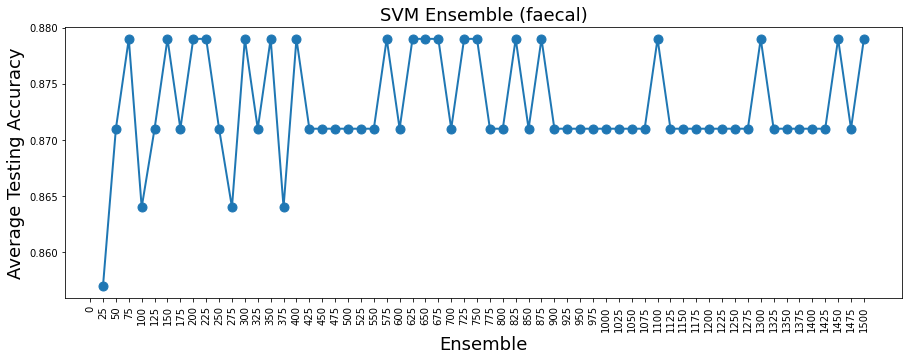

In [78]:
results_faecal_svm,names_ens_svm,best_ensembles_faecal_svm = get_best_ensembles_svm(X_faecal_pca,y_faecal,'faecal',test_size=0.3)


Fitting 20 folds for each of 61 candidates, totalling 1220 fits
Best: 0.605000 using {'n_estimators': 175}
>ensemble = 0 score = nan
>ensemble = 25 score = 0.573
>ensemble = 50 score = 0.568
>ensemble = 75 score = 0.582
>ensemble = 100 score = 0.568
>ensemble = 125 score = 0.582
>ensemble = 150 score = 0.573
>ensemble = 175 score = 0.605
>ensemble = 200 score = 0.595
>ensemble = 225 score = 0.591
>ensemble = 250 score = 0.591
>ensemble = 275 score = 0.586
>ensemble = 300 score = 0.564
>ensemble = 325 score = 0.573
>ensemble = 350 score = 0.577
>ensemble = 375 score = 0.568
>ensemble = 400 score = 0.577
>ensemble = 425 score = 0.568
>ensemble = 450 score = 0.582
>ensemble = 475 score = 0.564
>ensemble = 500 score = 0.573
>ensemble = 525 score = 0.577
>ensemble = 550 score = 0.555
>ensemble = 575 score = 0.55
>ensemble = 600 score = 0.591
>ensemble = 625 score = 0.573
>ensemble = 650 score = 0.568
>ensemble = 675 score = 0.577
>ensemble = 700 score = 0.573
>ensemble = 725 score = 0.577
>

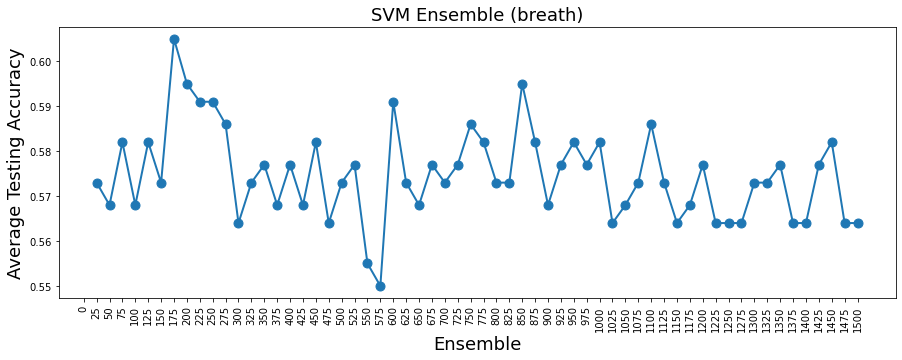

In [79]:
results_breath_svm,names_ens_svm,best_ensembles_breath_svm = get_best_ensembles_svm(X_breath_pca,y_breath,'breath',test_size=0.3)



Fitting 5 folds for each of 61 candidates, totalling 305 fits
Best: 0.700000 using {'n_estimators': 200}
>ensemble = 0 score = nan
>ensemble = 25 score = 0.62
>ensemble = 50 score = 0.54
>ensemble = 75 score = 0.62
>ensemble = 100 score = 0.66
>ensemble = 125 score = 0.64
>ensemble = 150 score = 0.68
>ensemble = 175 score = 0.68
>ensemble = 200 score = 0.7
>ensemble = 225 score = 0.66
>ensemble = 250 score = 0.64
>ensemble = 275 score = 0.64
>ensemble = 300 score = 0.66
>ensemble = 325 score = 0.64
>ensemble = 350 score = 0.66
>ensemble = 375 score = 0.64
>ensemble = 400 score = 0.6
>ensemble = 425 score = 0.64
>ensemble = 450 score = 0.62
>ensemble = 475 score = 0.66
>ensemble = 500 score = 0.64
>ensemble = 525 score = 0.64
>ensemble = 550 score = 0.62
>ensemble = 575 score = 0.6
>ensemble = 600 score = 0.66
>ensemble = 625 score = 0.64
>ensemble = 650 score = 0.6
>ensemble = 675 score = 0.68
>ensemble = 700 score = 0.64
>ensemble = 725 score = 0.62
>ensemble = 750 score = 0.62
>ensem

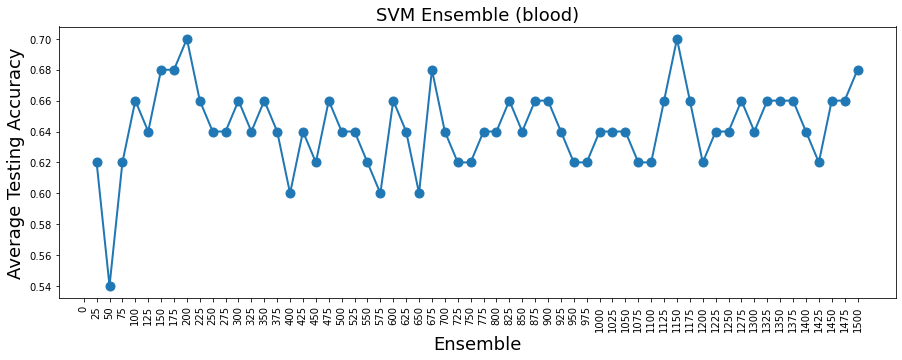

In [76]:
results_blood_svm,names_ens_svm,best_ensembles_blood_svm = get_best_ensembles_svm(X_blood_pca,y_blood,'blood',test_size=0.3)



Fitting 5 folds for each of 61 candidates, totalling 305 fits
Best: 0.700000 using {'n_estimators': 200}
>ensemble = 0 score = nan
>ensemble = 25 score = 0.58
>ensemble = 50 score = 0.64
>ensemble = 75 score = 0.6
>ensemble = 100 score = 0.6
>ensemble = 125 score = 0.6
>ensemble = 150 score = 0.62
>ensemble = 175 score = 0.6
>ensemble = 200 score = 0.7
>ensemble = 225 score = 0.6
>ensemble = 250 score = 0.64
>ensemble = 275 score = 0.66
>ensemble = 300 score = 0.64
>ensemble = 325 score = 0.68
>ensemble = 350 score = 0.64
>ensemble = 375 score = 0.6
>ensemble = 400 score = 0.64
>ensemble = 425 score = 0.64
>ensemble = 450 score = 0.68
>ensemble = 475 score = 0.64
>ensemble = 500 score = 0.64
>ensemble = 525 score = 0.62
>ensemble = 550 score = 0.62
>ensemble = 575 score = 0.7
>ensemble = 600 score = 0.66
>ensemble = 625 score = 0.68
>ensemble = 650 score = 0.64
>ensemble = 675 score = 0.66
>ensemble = 700 score = 0.6
>ensemble = 725 score = 0.66
>ensemble = 750 score = 0.68
>ensemble =

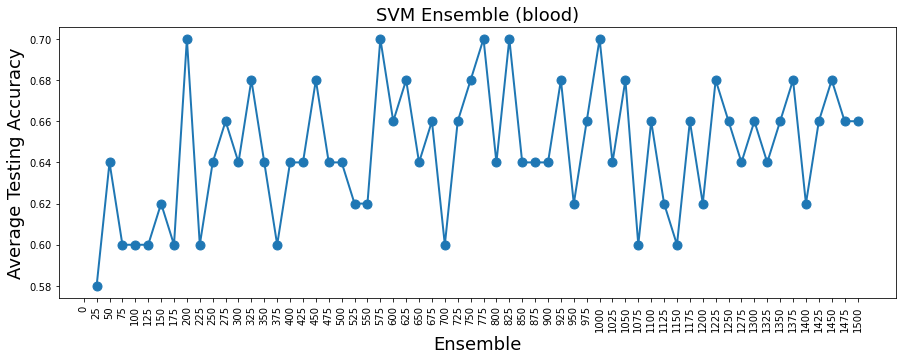

Fitting 5 folds for each of 61 candidates, totalling 305 fits
Best: 0.673000 using {'n_estimators': 625}
>ensemble = 0 score = nan
>ensemble = 25 score = 0.618
>ensemble = 50 score = 0.6
>ensemble = 75 score = 0.655
>ensemble = 100 score = 0.6
>ensemble = 125 score = 0.636
>ensemble = 150 score = 0.618
>ensemble = 175 score = 0.636
>ensemble = 200 score = 0.6
>ensemble = 225 score = 0.564
>ensemble = 250 score = 0.618
>ensemble = 275 score = 0.582
>ensemble = 300 score = 0.582
>ensemble = 325 score = 0.655
>ensemble = 350 score = 0.636
>ensemble = 375 score = 0.618
>ensemble = 400 score = 0.655
>ensemble = 425 score = 0.618
>ensemble = 450 score = 0.618
>ensemble = 475 score = 0.582
>ensemble = 500 score = 0.618
>ensemble = 525 score = 0.673
>ensemble = 550 score = 0.618
>ensemble = 575 score = 0.618
>ensemble = 600 score = 0.618
>ensemble = 625 score = 0.673
>ensemble = 650 score = 0.6
>ensemble = 675 score = 0.636
>ensemble = 700 score = 0.636
>ensemble = 725 score = 0.6
>ensemble = 

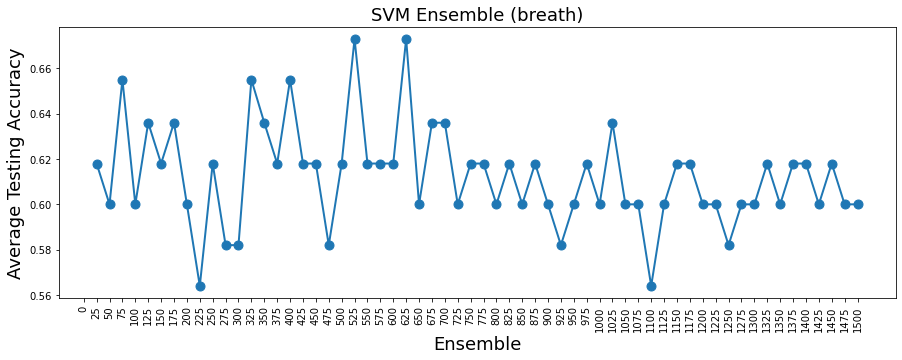

Fitting 5 folds for each of 61 candidates, totalling 305 fits
Best: 0.914000 using {'n_estimators': 25}
>ensemble = 0 score = nan
>ensemble = 25 score = 0.914
>ensemble = 50 score = 0.914
>ensemble = 75 score = 0.886
>ensemble = 100 score = 0.914
>ensemble = 125 score = 0.914
>ensemble = 150 score = 0.914
>ensemble = 175 score = 0.914
>ensemble = 200 score = 0.914
>ensemble = 225 score = 0.914
>ensemble = 250 score = 0.914
>ensemble = 275 score = 0.914
>ensemble = 300 score = 0.914
>ensemble = 325 score = 0.914
>ensemble = 350 score = 0.914
>ensemble = 375 score = 0.914
>ensemble = 400 score = 0.914
>ensemble = 425 score = 0.914
>ensemble = 450 score = 0.914
>ensemble = 475 score = 0.914
>ensemble = 500 score = 0.914
>ensemble = 525 score = 0.914
>ensemble = 550 score = 0.914
>ensemble = 575 score = 0.914
>ensemble = 600 score = 0.914
>ensemble = 625 score = 0.914
>ensemble = 650 score = 0.914
>ensemble = 675 score = 0.914
>ensemble = 700 score = 0.914
>ensemble = 725 score = 0.914
>en

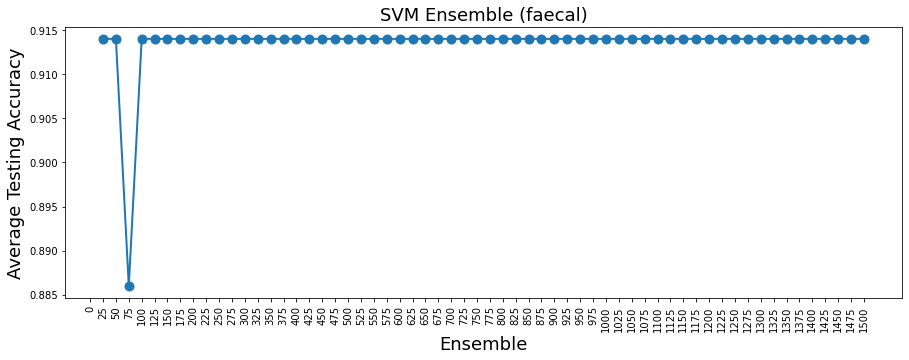

Fitting 5 folds for each of 61 candidates, totalling 305 fits
Best: 0.600000 using {'n_estimators': 275}
>ensemble = 0 score = nan
>ensemble = 25 score = 0.571
>ensemble = 50 score = 0.571
>ensemble = 75 score = 0.543
>ensemble = 100 score = 0.571
>ensemble = 125 score = 0.543
>ensemble = 150 score = 0.571
>ensemble = 175 score = 0.571
>ensemble = 200 score = 0.571
>ensemble = 225 score = 0.571
>ensemble = 250 score = 0.571
>ensemble = 275 score = 0.6
>ensemble = 300 score = 0.571
>ensemble = 325 score = 0.6
>ensemble = 350 score = 0.543
>ensemble = 375 score = 0.571
>ensemble = 400 score = 0.571
>ensemble = 425 score = 0.571
>ensemble = 450 score = 0.571
>ensemble = 475 score = 0.571
>ensemble = 500 score = 0.571
>ensemble = 525 score = 0.6
>ensemble = 550 score = 0.543
>ensemble = 575 score = 0.6
>ensemble = 600 score = 0.571
>ensemble = 625 score = 0.6
>ensemble = 650 score = 0.6
>ensemble = 675 score = 0.571
>ensemble = 700 score = 0.6
>ensemble = 725 score = 0.571
>ensemble = 750 

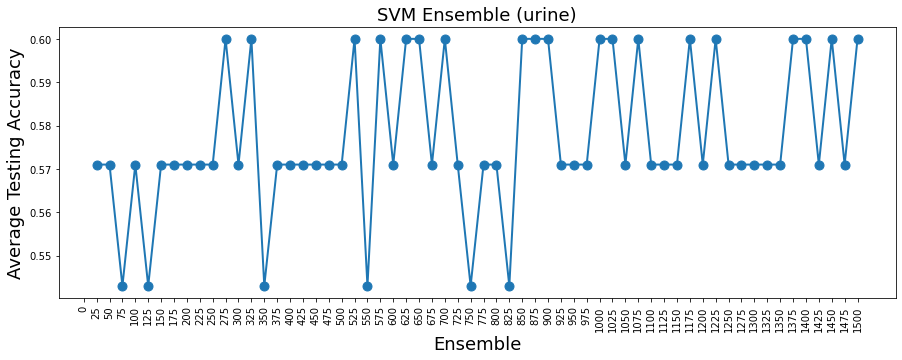

In [70]:
results_blood_svm,names_ens_svm,best_ensembles_blood_svm = get_best_ensembles_svm(X_blood_pca,y_blood,'blood',test_size=0.3)
results_breath_svm,names_ens_svm,best_ensembles_breath_svm = get_best_ensembles_svm(X_breath_pca,y_breath,'breath',test_size=0.3)
results_faecal_svm,names_ens_svm,best_ensembles_faecal_svm = get_best_ensembles_svm(X_faecal_pca,y_faecal,'faecal',test_size=0.3)
results_urine_svm,names_ens_svm,best_ensembles_urine_svm = get_best_ensembles_svm(X_urine_pca,y_urine,'urine',test_size=0.3)

In [59]:
ensembles_df_svm = pd.DataFrame({
    'ensembles(SVM)' : names_ens_svm,
    'avgTestingAcc(blood)' : results_blood_svm,
    'avgTestingAcc(breath)' : results_breath_svm,
    'avgTestingAcc(faecal)' : results_faecal_svm,
    'avgTestingAcc(urine)' : results_urine_svm,
})
print(tabulate(ensembles_df_svm, headers = 'keys', tablefmt = 'psql'))

+----+------------------+------------------------+-------------------------+-------------------------+------------------------+
|    |   ensembles(SVM) |   avgTestingAcc(blood) |   avgTestingAcc(breath) |   avgTestingAcc(faecal) |   avgTestingAcc(urine) |
|----+------------------+------------------------+-------------------------+-------------------------+------------------------|
|  0 |                0 |                 nan    |                 nan     |                 nan     |                nan     |
|  1 |               25 |                   0.61 |                   0.555 |                   0.914 |                  0.571 |
|  2 |               50 |                   0.56 |                   0.6   |                   0.886 |                  0.529 |
|  3 |               75 |                   0.61 |                   0.636 |                   0.9   |                  0.543 |
|  4 |              100 |                   0.59 |                   0.582 |                   0.857 |  

In [ ]:
best_ensembles_df_svm = pd.DataFrame({
    'sample_names':['blood','breath','faecal','urine'],
    'best_ensemble (SVM)':[best_ensembles_blood_svm[0],best_ensembles_breath_svm[0],
                     best_ensembles_faecal_svm[0],best_ensembles_urine_svm[0]]
})
print(tabulate(best_ensembles_df_svm, headers = 'keys', tablefmt = 'psql'))

### Bootstrap

In [ ]:
def get_best_bootstrap_svm(X,y,sample_name,test_size=0.3):
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_samples': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    }
    # Create a based model
    ensm_svc = BaggingClassifier(base_estimator = LinearSVC())
    
    # cross validate the data
    cv = StratifiedShuffleSplit(n_splits=10, test_size=test_size,random_state=1)
    
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = ensm_svc, param_grid = param_grid, 
                              cv = cv, n_jobs = -1, verbose = 2,  scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    best_bootstrap = []
    best_bootstrap.append(grid_result.best_params_['max_samples'])
    
    # summarize results
    print("="*100)
    print("Best: %f using %s" % (round(grid_result.best_score_,3), grid_result.best_params_))
    print("="*100)
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']
    results, names= list(), list()
    for mean, param in zip(means, params):
        print(f">bootstrap sample size = {param['max_samples']} score = {round(mean,3)}")
        results.append(round(mean,3))
        names.append(param['max_samples'])
    
    plt.figure(figsize=(15,5))
    names = (np.array(names).astype(float)*100).astype(int).tolist()
    plt.plot(names,results,marker='o', linewidth=2,markersize=9)
    plt.title(f"SVM Bootstrap Sample Size ({sample_name})", fontsize=18)
    plt.xlabel("Bootstrap",fontsize=18)
    plt.ylabel("Average Testing Accuracy",fontsize=18)  
    plt.xticks(rotation=90)
    plt.xticks(names)
    plt.show()
    return results,names,best_bootstrap


In [ ]:
results_blood_BS_svm,names_BS_svm,best_bootstrap_blood_svm = get_best_bootstrap_svm(X_blood_pca,y_blood,'blood',test_size=0.3)
results_breath_BS_svm,names_BS_svm,best_bootstrap_breath_svm = get_best_bootstrap_svm(X_breath_pca,y_breath,'breath',test_size=0.3)
results_faecal_BS_svm,names_BS_svm,best_bootstrap_faecal_svm = get_best_bootstrap_svm(X_faecal_pca,y_faecal,'faecal',test_size=0.3)
results_urine_BS_svm,names_BS_svm,best_bootstrap_urine_svm = get_best_bootstrap_svm(X_urine_pca,y_urine,'urine',test_size=0.3)

In [ ]:
bootstrap_df = pd.DataFrame({
    'Boostrap(SVM)' : names_BS_svm,
    'avgTestingAcc(blood)' : results_blood_BS_svm,
    'avgTestingAcc(breath)' : results_breath_BS_svm,
    'avgTestingAcc(faecal)' : results_faecal_BS_svm,
    'avgTestingAcc(urine)' : results_urine_BS_svm,
})
print(tabulate(bootstrap_df, headers = 'keys', tablefmt = 'psql'))

In [ ]:
best_bootstrap_df_svm = pd.DataFrame({
    'sample_names':['blood','breath','faecal','urine'],
    'best_bootstrap_sample (SVM)':[(best_bootstrap_blood_svm[0]*100),(best_bootstrap_breath_svm[0]*100),
                     (best_bootstrap_faecal_svm[0]*100),(best_bootstrap_urine_svm[0]*100)]
})
print(tabulate(best_bootstrap_df_svm, headers = 'keys', tablefmt = 'psql'))

### Holdout Validation on Final Model

In [ ]:
def get_best_parameters_svm(sample_name):
    sample = int(best_bootstrap_df_svm[best_bootstrap_df_svm['sample_names']==f'{sample_name}']['best_bootstrap_sample (SVM)'].tolist()[0])
    ensemble = best_ensembles_df_svm[best_ensembles_df_svm['sample_names']==f'{sample_name}']['best_ensemble (SVM)'].tolist()[0]
    return ensemble,sample

In [ ]:
ensemble_blood_svm,bootstrap_blood_svm = get_best_parameters_svm('blood')
ensemble_breath_svm,bootstrap_breath_svm = get_best_parameters_svm('breath')
ensemble_faecal_svm,bootstrap_faecal_svm = get_best_parameters_svm('faecal')
ensemble_urine_svm,bootstrap_urine_svm = get_best_parameters_svm('urine')

In [ ]:
def get_final_model_svm(ensemble,bootstrap):
    svc = BaggingClassifier(base_estimator = LinearSVC(),n_estimators = ensemble,max_samples = (bootstrap/100))
    return svc

In [ ]:
model_blood = get_final_model_svm(ensemble_blood_svm,bootstrap_blood_svm)
X_train_blood,X_test_blood,y_train_blood,y_test_blood = holdout_validation(X_blood_pca,y_blood,test_size=0.3)
model_blood.fit(X_train_blood,y_train_blood)
y_pred = model_blood.predict(X_test_blood)
modelEvaluation(y_pred,y_test_blood,'Sample blood Results')

In [ ]:
model_breath = get_final_model_svm(ensemble_breath_svm,bootstrap_breath_svm)
X_train_breath,X_test_breath,y_train_breath,y_test_breath = holdout_validation(X_breath_pca,y_breath,test_size=0.3)
model_breath.fit(X_train_breath,y_train_breath)
y_pred = model_breath.predict(X_test_breath)
modelEvaluation(y_pred,y_test_breath,'Sample breath Results')

In [ ]:
model_faecal = get_final_model_svm(ensemble_faecal_svm,bootstrap_faecal_svm)
X_train_faecal,X_test_faecal,y_train_faecal,y_test_faecal = holdout_validation(X_faecal_pca,y_faecal,test_size=0.3)
model_faecal.fit(X_train_faecal,y_train_faecal)
y_pred = model_faecal.predict(X_test_faecal)
modelEvaluation(y_pred,y_test_faecal,'Sample faecal Results')

In [ ]:
model_urine = get_final_model_svm(ensemble_urine_svm,bootstrap_urine_svm)
X_train_urine,X_test_urine,y_train_urine,y_test_urine = holdout_validation(X_urine_pca,y_urine,test_size=0.3)
model_urine.fit(X_train_urine,y_train_urine)
y_pred = model_urine.predict(X_test_urine)
modelEvaluation(y_pred,y_test_urine,'Sample urine Results')